In [1]:
## 共享GPU
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.25)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)) 

In [2]:
from keras.layers import Activation, Conv2D, BatchNormalization, Dense
from keras.layers import Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras import Model 
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [65]:
# 读取训练集与验证集
IMSIZE = 224
train_generator = ImageDataGenerator(rescale=1./225).flow_from_directory('/mnt/data/dog_cat/train',
                                                                        target_size=(IMSIZE,IMSIZE),
                                                                        batch_size=64,
                                                                        class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./225).flow_from_directory('/mnt/data/dog_cat/test',
                                                                        target_size=(IMSIZE,IMSIZE),
                                                                        batch_size=64,
                                                                        class_mode='categorical')


Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

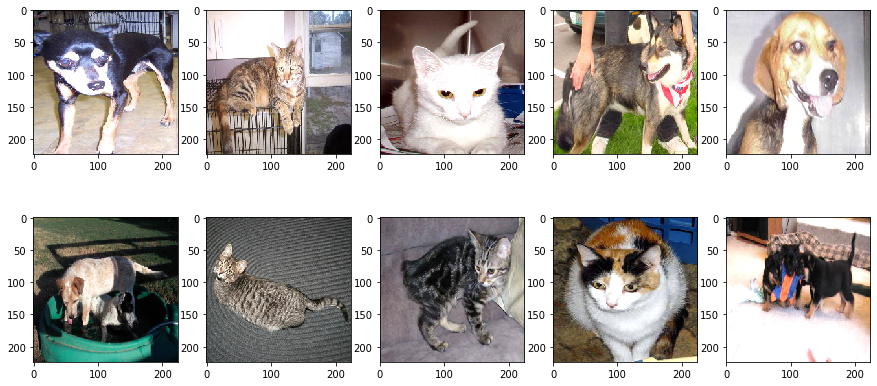

In [39]:
plt.figure()
fig, ax = plt.subplots(2,5)
fig.set_figheight(7)
fig.set_figwidth(15)
ax = ax.flatten()
X, Y = next(validation_generator)
for i in range(10):
    ax[i].imshow(X[i,:,:,:])
plt.show()

# 自定义VGG16

In [62]:
def my_vgg16(include_top = False, IMSIZE=224, num_class=2):
    
    input_layer = Input([IMSIZE,IMSIZE,3])
    x = input_layer
    
    x = Conv2D(64,[3,3],padding='same',activation='relu')(x)
    x = Conv2D(64,[3,3],padding='same',activation='relu')(x)
    x = MaxPooling2D([2,2],strides=[2,2])(x)
    
    x = Conv2D(128,[3,3],padding='same',activation='relu')(x)
    x = Conv2D(128,[3,3],padding='same',activation='relu')(x)
    x = MaxPooling2D([2,2],strides=[2,2])(x)
    
    x = Conv2D(128*2,[3,3],padding='same',activation='relu')(x)
    x = Conv2D(128*2,[3,3],padding='same',activation='relu')(x)
    x = Conv2D(128*2,[3,3],padding='same',activation='relu')(x)
    x = MaxPooling2D([2,2],strides=[2,2])(x)
    
    x = Conv2D(128*2*2,[3,3],padding='same',activation='relu')(x)
    x = Conv2D(128*2*2,[3,3],padding='same',activation='relu')(x)
    x = Conv2D(128*2*2,[3,3],padding='same',activation='relu')(x)
    x = MaxPooling2D([2,2],strides=[2,2])(x)
    
    x = Conv2D(128*2*2,[3,3],padding='same',activation='relu')(x)
    x = Conv2D(128*2*2,[3,3],padding='same',activation='relu')(x)
    x = Conv2D(128*2*2,[3,3],padding='same',activation='relu')(x)
    x = MaxPooling2D([2,2],strides=[2,2])(x)
    if include_top:
        x = Dense(4096, activation='relu')(x)
        x = Dense(4096, activation='relu')(x)
    else:
        x = Flatten()(x)
    x = Dense(num_class, activation='softmax')(x)
    output_layer = x
    model = Model(input_layer,output_layer)
    return model

In [63]:
model = my_vgg16()
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 56, 56, 128)       0   

In [66]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
274/274 [==============================] - 383s 1s/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/10
274/274 [==============================] - 472s 2s/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/10
274/274 [==============================] - 508s 2s/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 4/10
274/274 [==============================] - 387s 1s/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
274/274 [==============================] - 434s 2s/step - loss: 0.6932 - accuracy: 0.4935 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 6/10
274/274 [==============================] - 488s 2s/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 7/10
274/274 [==============================] - 409s 1s/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5000

In [67]:
model.save('../pretrain_models/my_vgg16_0.h5') # 保存刚才训练的vgg16

# 采用预训练模型的参数进行初始化

## 自有预训练模型

In [21]:
from keras.models import load_model

In [68]:
my_model = my_vgg16()
my_model.load_weights('../pretrain_models/my_vgg16_0.h5',by_name=False)

In [72]:
IMSIZE = 224
train_generator = ImageDataGenerator(rescale=1./225).flow_from_directory('/mnt/data/dog_cat/train',
                                                                        target_size=(IMSIZE,IMSIZE),
                                                                        batch_size=64,
                                                                        class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./225).flow_from_directory('/mnt/data/dog_cat/test',
                                                                        target_size=(IMSIZE,IMSIZE),
                                                                        batch_size=64,
                                                                        class_mode='categorical')


Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


In [73]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.fit_generator(train_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
274/274 [==============================] - 432s 2s/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
274/274 [==============================] - 315s 1s/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
274/274 [==============================] - 297s 1s/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 4/5
274/274 [==============================] - 287s 1s/step - loss: 0.6932 - accuracy: 0.4929 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/5
274/274 [==============================] - 258s 942ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6950 - val_accuracy: 0.5000


## keras封装的vgg16

In [ ]:
# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5
# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
#从上两个网址分别下载包含、不包含全连接层的vgg16预训练模型，放到mnt/pretrain_models
# mkdir -p ~/.keras/models/
# cp /mnt/pretrain_models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5  ~/.keras/models

In [ ]:
# https://github.com/tensorflow/tensorflow/blob/r1.10/tensorflow/python/keras/applications/vgg16.py

In [1]:
from keras.applications.vgg16 import VGG16
from keras import Sequential

## 更新预训练模型参数

In [76]:
model2 = Sequential() # 创建一个空的结构
model2.add(VGG16(include_top=False,weights='imagenet',input_shape=(IMSIZE,IMSIZE,3))) # 第一层为没有全连接层的vgg16网络结构；设置输入层为（224,224,3）
model2.add(Flatten()) # 将vgg16的最后一个池化层的结果拉直
model2.add(Dense(2, activation='softmax')) # 创建二分类的输出层
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_19 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 14,764,866
Non-trainable params: 0
_________________________________________________________________


In [77]:
model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy']
            )
model2.fit_generator(train_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
274/274 [==============================] - 319s 1s/step - loss: 0.7148 - accuracy: 0.5759 - val_loss: 0.8695 - val_accuracy: 0.6328
Epoch 2/5
274/274 [==============================] - 247s 902ms/step - loss: 0.5208 - accuracy: 0.7382 - val_loss: 0.2702 - val_accuracy: 0.8255
Epoch 3/5
274/274 [==============================] - 349s 1s/step - loss: 0.3606 - accuracy: 0.8369 - val_loss: 0.0531 - val_accuracy: 0.8651
Epoch 4/5
274/274 [==============================] - 317s 1s/step - loss: 0.3004 - accuracy: 0.8702 - val_loss: 0.0925 - val_accuracy: 0.8907
Epoch 5/5
274/274 [==============================] - 350s 1s/step - loss: 0.2805 - accuracy: 0.8794 - val_loss: 0.0605 - val_accuracy: 0.9063


## 不更新预训练模型参数

In [57]:
model1 = Sequential() # 创建一个空的结构
model1.add(VGG16(include_top=False,weights='imagenet',input_shape=(IMSIZE,IMSIZE,3))) # 第一层为没有全连接层的vgg16网络结构
model1.add(Flatten()) # 将vgg16的最后一个池化层拉直
model1.add(Dense(2, activation='softmax')) # 创建二分类的输出层
model1.layers[0].trainable = False # 保持预训练模型中的权重始终不变
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
model1.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy']
            )
model1.fit_generator(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
175/175 [==============================] - 337s 2s/step - loss: 0.2173 - accuracy: 0.9131 - val_loss: 0.1218 - val_accuracy: 0.9320
Epoch 2/10
175/175 [==============================] - 338s 2s/step - loss: 0.1224 - accuracy: 0.9519 - val_loss: 0.0784 - val_accuracy: 0.9275
Epoch 3/10
175/175 [==============================] - 355s 2s/step - loss: 0.0937 - accuracy: 0.9646 - val_loss: 0.2375 - val_accuracy: 0.9255
Epoch 4/10
175/175 [==============================] - 325s 2s/step - loss: 0.0668 - accuracy: 0.9766 - val_loss: 0.2506 - val_accuracy: 0.9265
Epoch 5/10
175/175 [==============================] - 357s 2s/step - loss: 0.0502 - accuracy: 0.9857 - val_loss: 0.1936 - val_accuracy: 0.9380
Epoch 6/10
175/175 [==============================] - 400s 2s/step - loss: 0.0398 - accuracy: 0.9897 - val_loss: 0.2183 - val_accuracy: 0.9251
Epoch 7/10
175/175 [==============================] - 326s 2s/step - loss: 0.0337 - accuracy: 0.9929 - val_loss: 0.1764 - val_accuracy: 0.9263

## 数据预处理

In [6]:
IMSIZE = 224
train_generator = ImageDataGenerator(rescale=1./225).flow_from_directory('/mnt/dog_cat_change/train',
                                                                        target_size=(IMSIZE,IMSIZE),
                                                                        batch_size=64,
                                                                        class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./225).flow_from_directory('/mnt/dog_cat_change/test',
                                                                        target_size=(IMSIZE,IMSIZE),
                                                                        batch_size=64,
                                                                        class_mode='categorical')

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

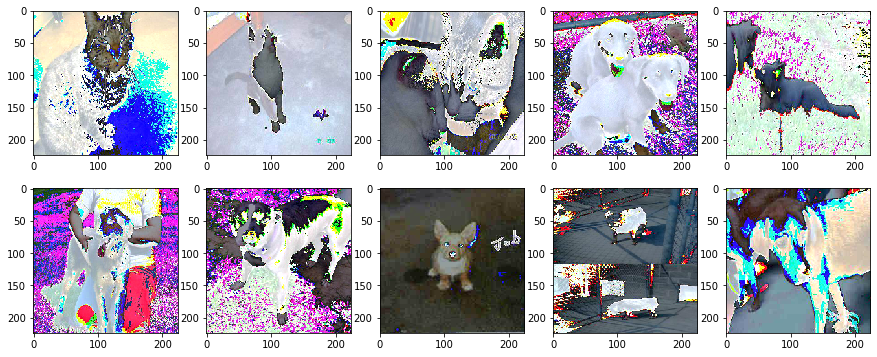

In [7]:
fig, ax = plt.subplots(2, 5)
fig.set_figheight(6)
fig.set_figwidth(15)
x,y = next(train_generator)
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(x[i,:,:,:])

In [8]:
model1 = Sequential() # 创建一个空的结构
model1.add(VGG16(include_top=False,weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',input_shape=(IMSIZE,IMSIZE,3))) # 第一层为没有全连接层的vgg16网络结构
model1.add(Flatten()) # 将vgg16的最后一个池化层拉直
model1.add(Dense(2, activation='softmax')) # 创建二分类的输出层
model1.layers[0].trainable = False # 保持预训练模型中的权重始终不变
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
from keras.optimizers import SGD
model1.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01, momentum=0.9),metrics=['accuracy'])
model1.fit_generator(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
274/274 [==============================] - 375s 1s/step - loss: 8.0542 - accuracy: 0.7635 - val_loss: 8.6154 - val_accuracy: 0.6900
Epoch 2/10
274/274 [==============================] - 357s 1s/step - loss: 2.9857 - accuracy: 0.8135 - val_loss: 2.0680e-04 - val_accuracy: 0.8867
Epoch 3/10
274/274 [==============================] - 365s 1s/step - loss: 1.6424 - accuracy: 0.8578 - val_loss: 7.1297 - val_accuracy: 0.7473
Epoch 4/10
274/274 [==============================] - 352s 1s/step - loss: 1.4488 - accuracy: 0.8634 - val_loss: 2.7533 - val_accuracy: 0.8763
Epoch 5/10
274/274 [==============================] - 331s 1s/step - loss: 2.0563 - accuracy: 0.8468 - val_loss: 3.7595 - val_accuracy: 0.8187
Epoch 6/10
274/274 [==============================] - 331s 1s/step - loss: 1.2504 - accuracy: 0.8849 - val_loss: 0.8384 - val_accuracy: 0.8735
Epoch 7/10
274/274 [==============================] - 304s 1s/step - loss: 1.2218 - accuracy: 0.8795 - val_loss: 0.3794 - val_accuracy: 0.